# Kmeans 

Kmeans goal is to find clusters in a set of unlabeled data

In [34]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans,vq

Considering the following set of random points. Our goal is to split them into two distinct clusters.

Each sample can be assigned only to a single cluster.

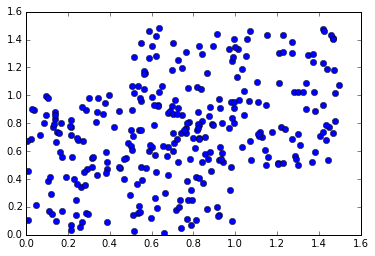

In [76]:
# data generation
data = np.vstack((np.random.rand(150,2) + np.array([.5,.5]), np.random.rand(150,2)))
plt.plot(data[:, 0], data[:, 1], 'ob')
plt.show()

We random generate an initial state.

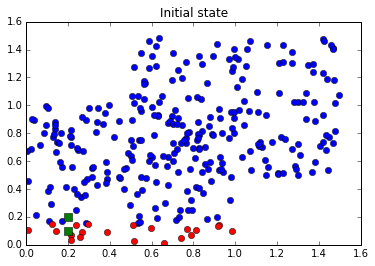

In [77]:
centers = np.array([[0.2, 0.2], [0.2, 0.1]])
idx2,_ = vq(data, centers)

# some plotting using numpy's logical indexing
plt.plot(data[idx2==0,0], data[idx2==0,1],'ob',
         data[idx2==1,0], data[idx2==1,1],'or')

plt.plot(centers[:,0], centers[:,1],'sg',markersize=8)
plt.title('Initial state')
plt.show()

## moving step

Until convergence, we move the center of data to cluster's means. Then, first of all let's compute mean for both clusters.

In [78]:
c1 = data[idx2==0,:].mean(axis=0)
c2 = data[idx2==1,:].mean(axis=0)

print 'Mean for cluster 1', c1
print 'Mean for cluster 2', c2

Mean for cluster 1 [ 0.75253953  0.79220571]
Mean for cluster 2 [ 0.4944689   0.09560193]


Reassign cluster centroid according to cluster mean

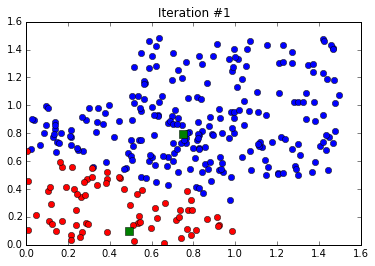

In [79]:
ncenter = np.vstack((c1, c2))

idx2,_ = vq(data, ncenter)

# some plotting using numpy's logical indexing
plt.plot(data[idx2==0,0], data[idx2==0,1],'ob',
         data[idx2==1,0], data[idx2==1,1],'or')

plt.plot(ncenter[:,0], ncenter[:,1],'sg',markersize=8)
plt.title('Iteration #1')
plt.show()

## Repeat 

When we stopping moving centroids the algorithm converges.

In [82]:
c1 = data[idx2==0,:].mean(axis=0)
c2 = data[idx2==1,:].mean(axis=0)

print 'Mean for cluster 1', c1
print 'Mean for cluster 2', c2

Mean for cluster 1 [ 0.91665441  0.92467243]
Mean for cluster 2 [ 0.40105114  0.4117602 ]


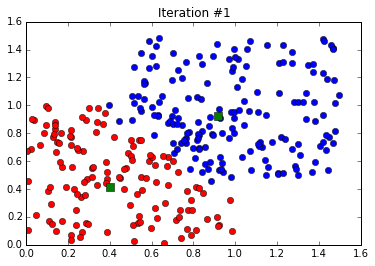

In [83]:
ncenter = np.vstack((c1, c2))

idx2,_ = vq(data, ncenter)

# some plotting using numpy's logical indexing
plt.plot(data[idx2==0,0], data[idx2==0,1],'ob',
         data[idx2==1,0], data[idx2==1,1],'or')

plt.plot(ncenter[:,0], ncenter[:,1],'sg',markersize=8)
plt.title('Iteration #1')
plt.show()

## Final state

The goal is to reach the final state like the following

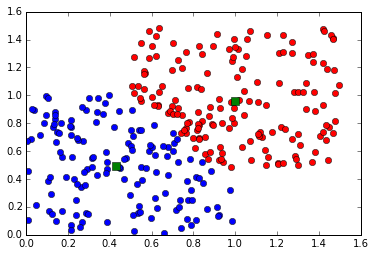

In [84]:
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
         data[idx==1,0],data[idx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()